### Macro-averaged ROC and AUC

In [ ]:
n_classes=len(class_names)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.00, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.4f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.9957


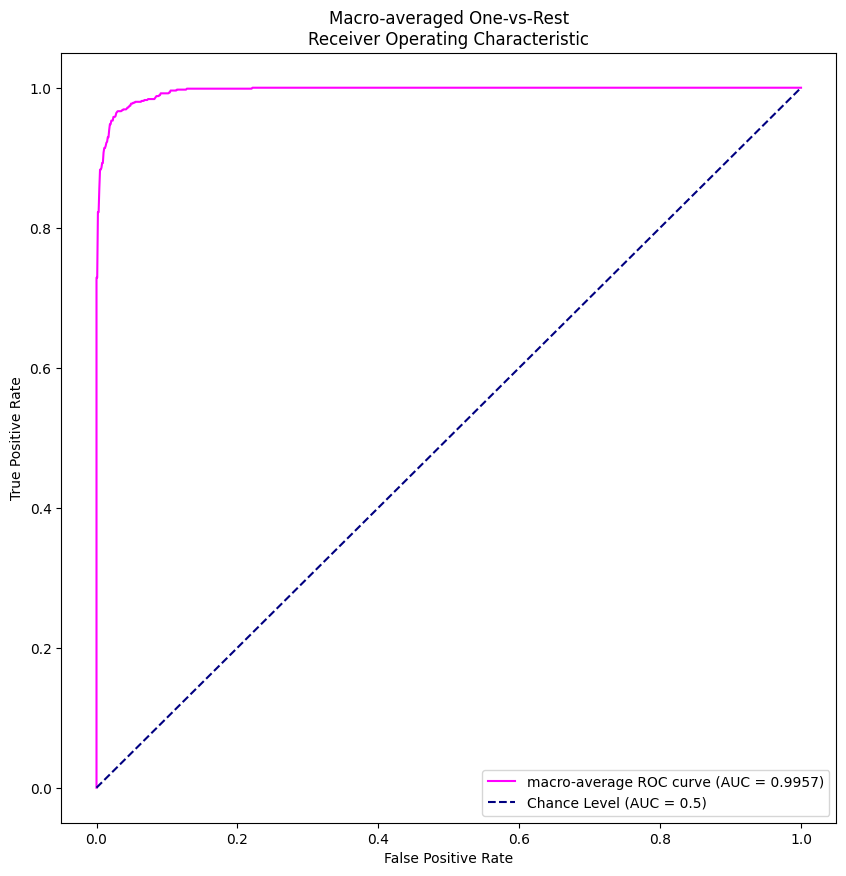

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    [0] + list(fpr["macro"]), # Add [0] to fix not starting from 0
    [0] + list(tpr["macro"]),
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.4f})",
    color="magenta"
)

# Plot the chance level line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Chance Level (AUC = 0.5)')

plt.legend(loc='lower right')

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Macro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

### Macro-averaged precision, recall, F1

In [ ]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()

# A "macro-average": quantifying score on all classes jointly
precision["macro"], recall["macro"], _ = precision_recall_curve(
    y_onehot_test.ravel(), y_pred.ravel()
)
average_precision["macro"] = average_precision_score(y_onehot_test, y_pred, average="macro")

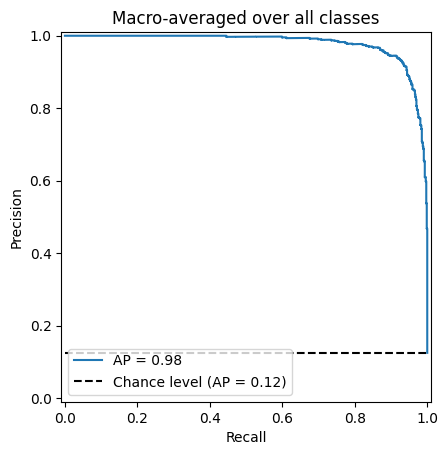

In [ ]:
display = PrecisionRecallDisplay(
    recall=recall["macro"],
    precision=precision["macro"],
    average_precision=average_precision["macro"],
    prevalence_pos_label=Counter(y_onehot_test.ravel())[1] / y_onehot_test.size,
)
display.plot(plot_chance_level=True)
_ = display.ax_.set_title("Macro-averaged over all classes")

In [ ]:
precision_macro = precision_score(true_categories, predicted_categories.numpy(), average='macro')
recall_macro = recall_score(true_categories, predicted_categories.numpy(), average='macro')
f1_macro = f1_score(true_categories, predicted_categories.numpy(), average='macro')

macro_roc_auc_ovr = roc_auc_score( true_categories.numpy(), y_pred, multi_class="ovr", average="macro")

In [ ]:
pd.DataFrame({
    'Accuracy': [f"{accuracy:.4f}"],
    'Precision': [f"{precision_macro:.4f}"],
    'Recall': [f"{recall_macro:.4f}"],
    'F1 Score': [f"{f1_macro:.4f}"],
    'ROC AUC': [f"{macro_roc_auc_ovr:.4f}"],
})

,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.9293,0.9343,0.9288,0.9301,0.9957


## Obsolete Precision, recall, F1 Graph

In [ ]:
from itertools import cycle

import matplotlib.pyplot as plt

# setup plot details
colors = cycle(["blue", "red", "green", "black", "purple", "orange", "yellow", "cyan"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="magenta")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_names[i]}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()